In [20]:
import dataclasses
import jax

import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
from openpi.models import model as _model
from openpi.policies import droid_policy
from openpi.policies import policy_config as _policy_config
from openpi.shared import download
from openpi.training import config as _config
from openpi.training import data_loader as _data_loader

/home/hoeun/anaconda3/envs/pizero/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
config = _config.get_config("pi0_fast_droid")
checkpoint_dir = download.maybe_download("gs://openpi-assets/checkpoints/pi0_fast_droid")

In [5]:
# create trained policy
policy = _policy_config.create_trained_policy(config, checkpoint_dir)

Some kwargs in processor config are unused and will not have any effect: scale, vocab_size, min_token, time_horizon, action_dim. 
Some kwargs in processor config are unused and will not have any effect: scale, vocab_size, min_token, time_horizon, action_dim. 


In [6]:
# run inference on dummy example
example = droid_policy.make_droid_example()

In [18]:
print(example.keys())
print(example["observation/exterior_image_1_left"].shape) # (244, 244, 3)
print(example["observation/wrist_image_left"].shape) # (244, 244, 3)
print(example["observation/joint_position"]) # (7, )
print(example["observation/gripper_position"]) # (1, )
print(example["prompt"])

dict_keys(['observation/exterior_image_1_left', 'observation/wrist_image_left', 'observation/joint_position', 'observation/gripper_position', 'prompt'])
(224, 224, 3)
(224, 224, 3)
[0.06854763 0.35861775 0.38251047 0.76683575 0.85337416 0.07603681
 0.24467456]
[0.99523788]
do something


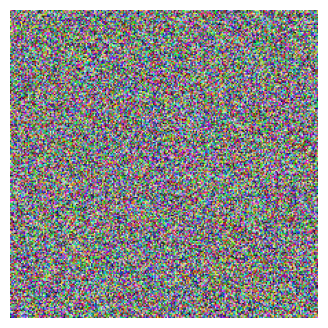

In [21]:
plt.figure(figsize=(4, 4))
plt.imshow(example["observation/exterior_image_1_left"])
plt.axis('off')
plt.show()

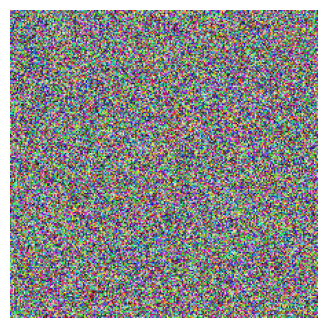

In [22]:
plt.figure(figsize=(4, 4))
plt.imshow(example["observation/wrist_image_left"])
plt.axis('off')
plt.show()

In [23]:
result = policy.infer(example)

In [24]:
print(result.keys())

dict_keys(['actions', 'policy_timing'])


In [25]:
actions = result["actions"]

In [27]:
print("Action Shape:", actions.shape)
print("Action:", actions[0])

Action Shape: (10, 8)
Action: [ 0.00545606 -0.26185038 -0.22036585 -0.01090471 -0.11936543 -0.24963209
  0.10405867  1.00576424]
